<a href="https://colab.research.google.com/github/vinayakpotdar2114/Capstone-Project-2-Sales-Prediction-Rossmann-Sales-Prediction/blob/main/Sales_Prediction_Rossmann_Sales_Prediction_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**
# **Problem Description**
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


# **Data Description**


**Rossmann Stores Data.csv** - historical data including Sales

**store.csv** - supplemental information about the stores

# **Data fields**

***Most of the fields are self-explanatory. The following are descriptions for those that aren't.***

Id - an Id that represents a (Store, Date) tuple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
pd.set_option("display.max_columns",None)

# Data Prep and Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Rossmann Stores Data
rs_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rossmann Sales Prediction - Potdar Vinayak/dataset/Rossmann Stores Data.csv',low_memory=False)
rs_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rs_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
#Importing the Stores Data
s_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rossmann Sales Prediction - Potdar Vinayak/dataset/store.csv')
s_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
s_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
rs_data.shape

(1017209, 9)

In [ ]:
s_data.shape

(1115, 10)

We can see that both the tables have different number of records, but the Store ID can be used to join the s_data with the rs_data table.

In [ ]:
rs_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
s_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The major feature that can help in the further analysis is CompetetionDistance. The rest of the features with missing values wont be contributing much in terms of prediction of sales, as about 1/3rd of the data is missing from those features. Let us handle the 3 missing values and leave the rest alone for now.

The Missing values can be replaced by median or mode as they are not really affected by the outliers.

In [ ]:
# Replacing the missing values with the median of the data.
s_data['CompetitionDistance'].fillna(s_data['CompetitionDistance'].median(), inplace = True)

Now, let us start with cleaning and rearranging the data as per our need. We shall start with the date.

In [ ]:
rs_data['Year'] =pd.DatetimeIndex(rs_data['Date']).year
rs_data['Month'] =pd.DatetimeIndex(rs_data['Date']).month
rs_data['Day'] =pd.DatetimeIndex(rs_data['Date']).day


In [ ]:
rs_data = rs_data.reset_index()

In [ ]:
rs_data.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [ ]:
rs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   index          1017209 non-null  int64 
 1   Store          1017209 non-null  int64 
 2   DayOfWeek      1017209 non-null  int64 
 3   Date           1017209 non-null  object
 4   Sales          1017209 non-null  int64 
 5   Customers      1017209 non-null  int64 
 6   Open           1017209 non-null  int64 
 7   Promo          1017209 non-null  int64 
 8   StateHoliday   1017209 non-null  object
 9   SchoolHoliday  1017209 non-null  int64 
 10  Year           1017209 non-null  int64 
 11  Month          1017209 non-null  int64 
 12  Day            1017209 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 100.9+ MB


We may drop the date column if we want, because it's function is being fulfilled by the three colums we just created. We can go ahead with joining both the tables. rs_data is the data with more records, so we should left join s_data onto rs_data.

In [ ]:
# Here we are joining the two tables on the feature Store as it consists the unique id of each store.
dataset = pd.merge(rs_data, s_data, how='left', on='Store')

In [ ]:
dataset.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
dataset.shape

(1017209, 22)

In [ ]:
dataset.describe()

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.086040e+05,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,5.422021e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,2.936431e+05,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,7.706918e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.543020e+05,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.086040e+05,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.325000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,7.629060e+05,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,6.880000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.017208e+06,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


Here, we can see a crucial detail in the data. We can observe sales=0 as the minimum number of sales, this indicates that there are stores which might just have opened or started. Although dropping this data does not make sense as there can be days when the store is not open, so the sales are recorded as zero.

Let us refrain from dropping those records for now.
 

Now that we have the data in a fairly good shape and form, let us understand the correlation between the features. This will help us in the EDA.

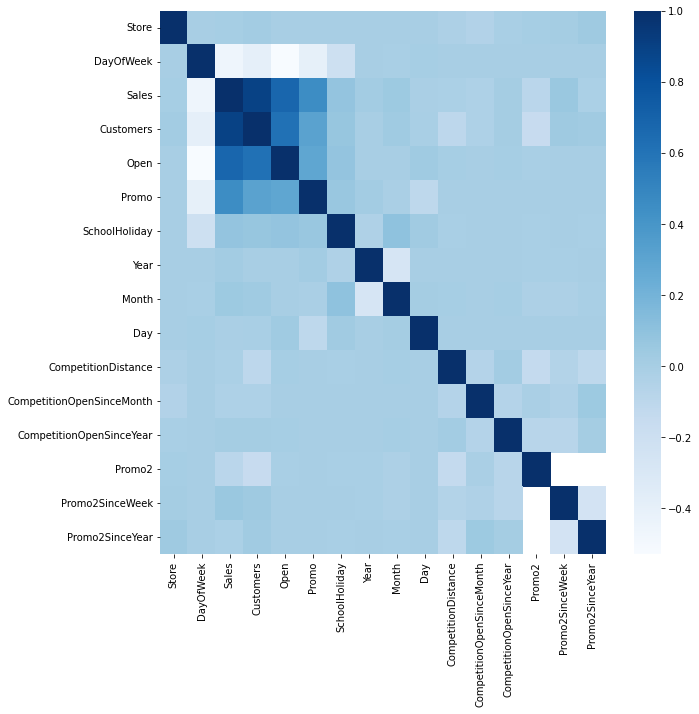

In [ ]:
#Creating a correlation matrix 
cordata=dataset[['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]
corr = cordata.corr()
fig= plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap="Blues", annot=False)

In [ ]:
correlations = dataset.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.462125
Promo2                      -0.091040
index                       -0.041906
CompetitionOpenSinceMonth   -0.028257
Promo2SinceYear             -0.021127
CompetitionDistance         -0.018869
Day                         -0.011612
Store                        0.005126
CompetitionOpenSinceYear     0.012659
Year                         0.023519
Month                        0.048768
Promo2SinceWeek              0.059558
SchoolHoliday                0.085124
Promo                        0.452345
Open                         0.678472
Customers                    0.894711
Sales                        1.000000
Name: Sales, dtype: float64

**OBSERVATIONS:**
Here we can see some clear correlations between sales and some other features. These features are Customers, Open, Promo, SchoolHoliday. All the above mentioned features share a positive relation with Sales. 

There are a few features, which show a negative relation with Sales viz. Promo2 and DayofWeek.

As per ISO 8601 Monday should be the first day of the week. In US, Canada and Japan, Monday is considered as the second day. The present data follows ISO standards as the first date 15-7-31 in the table represents the 5th day i.e. Friday.

# **Exploratory Data Analysis**

As we can see in the correlation matrix, we have some positively related features with sales and two negatively related features. Let us start.

**1. Customers vs Sales**

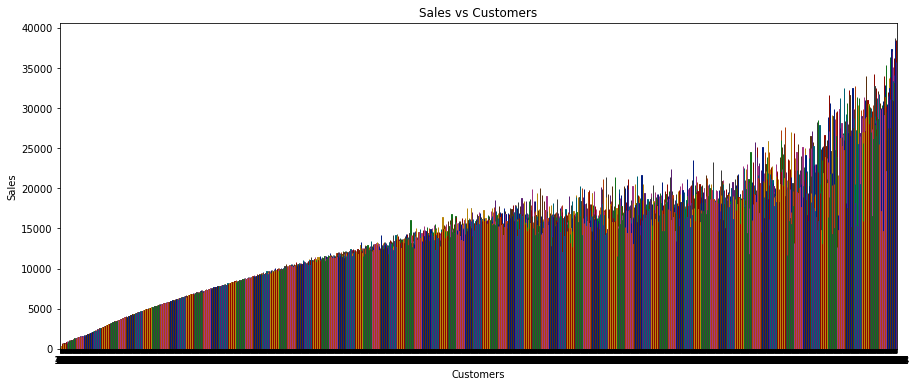

In [ ]:
plt.subplots(figsize=(15,6))
cus = rs_data.groupby('Customers').Sales.mean().to_frame().reset_index()
cus.columns = ['Customers','Sales']
sns.barplot(x=cus.Customers, y=cus.Sales, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.title('Sales vs Customers')
plt.show()  

It is easy to spot that the graph shows a positive growth in the overall trend. As the number of customers increase, the number of sales also increase.

---
We can observe another pattern in the graph as the number of customers increase. We can see a bit of distortion or uneven number of sales while the customers are increasing in number. This can be due to the price of the products being sold in the store. We will be able to verify this hypothesis while studying the promo features.


---


This can be our null hypothesis:
H0 = Sales of the products are higher with a promotional offer.


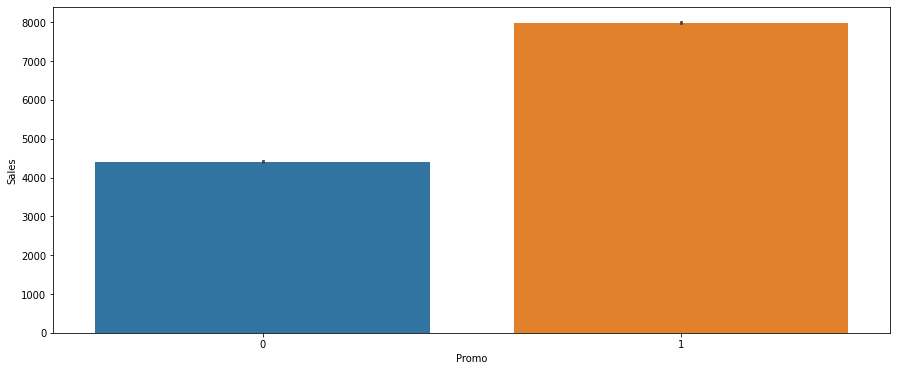

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Promo', y='Sales', data=rs_data)

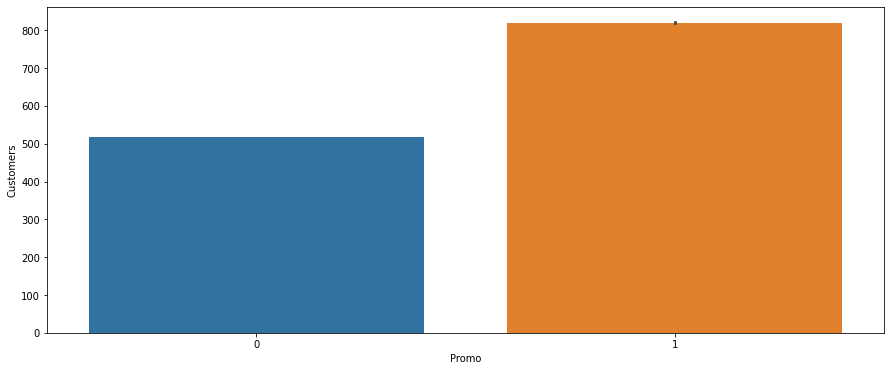

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Promo', y='Customers', data=rs_data)

**Findings**: We can see that both, 'Customers' and 'Sales' show a higher number when the promotional offer is active. Hence, we **Failed to Reject the Hypothesis** for now.

Let us understand the realtion between the second promotional offer (Promo2) that was active, as it shows a bit of negative realtion with the sales numbers.

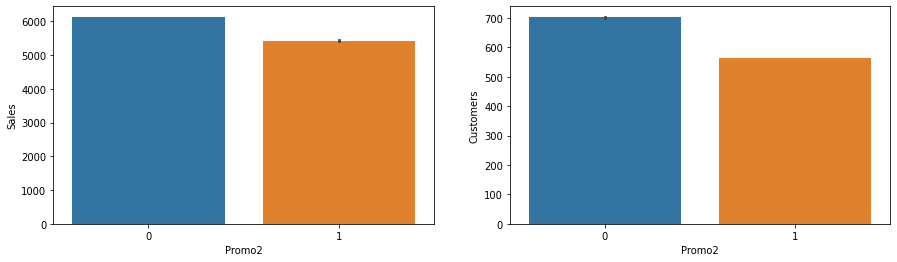

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Promo2', y='Sales', data=dataset, ax=axis1)
sns.barplot(x='Promo2', y='Customers', data=dataset, ax=axis2)

**Findings** : Here we can see that both customers and sales value are marginally lower with the promotional offer (Promo2) active. Here we can safelty **reject the null hypothesis** that says, Sales are Higher with a active promotional offer.

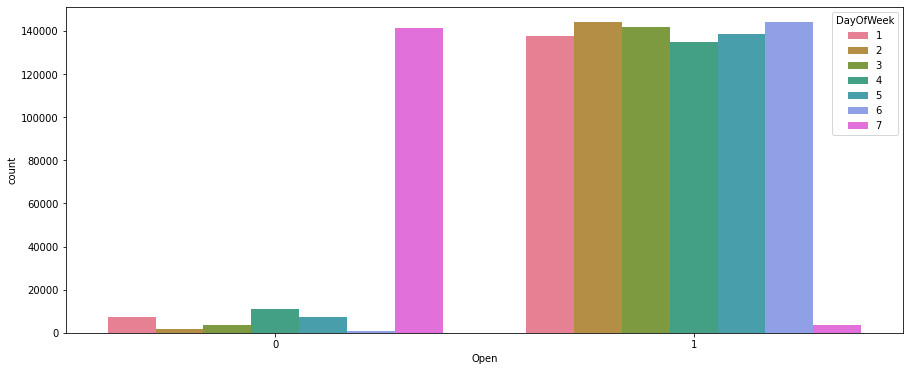

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Open',hue='DayOfWeek', data=dataset,palette="husl")

We can observe that most of the shops are open on the weekdays and closed on Sundays.

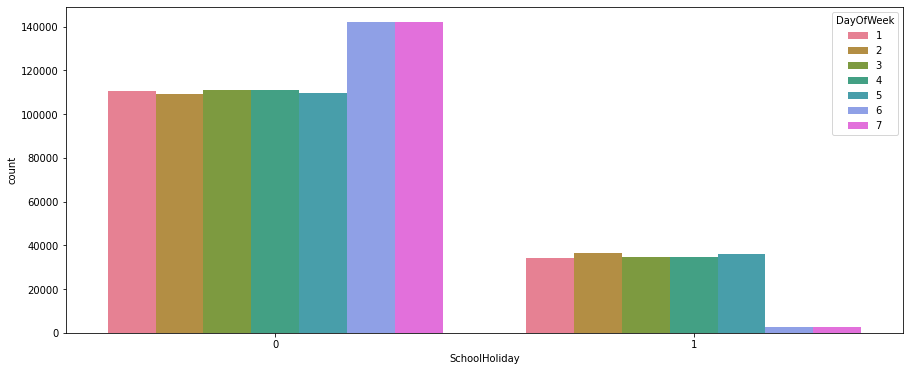

In [51]:
plt.subplots(figsize=(15,6))
sns.countplot(x='SchoolHoliday',hue='DayOfWeek', data=dataset,palette="husl")

Here, School Holiday shows us if the Store was affected by the closure of the School. **'1'** means the store was affected, while **'0'** means the store was not affected by the closure of the school.

---



**Findings** Comparing the above two charts we can see that the stores were not much affected on Saturday and Sunday as they we also closed along with the school.

Here we can also see that the stores were affected by the closure of the School on weekdays. It affects almost 1/3rd stores of the whole.

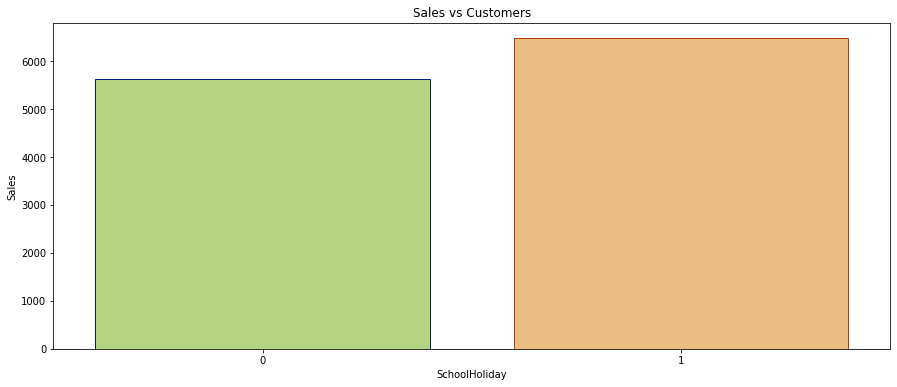

In [52]:
plt.subplots(figsize=(15,6))
cus = rs_data.groupby('SchoolHoliday').Sales.mean().to_frame().reset_index()
cus.columns = ['SchoolHoliday','Sales']
sns.barplot(x=cus.SchoolHoliday, y=cus.Sales, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.title('Sales vs Customers')
plt.show()  